In [1]:
import pandas as pd
import numpy as np

In [2]:
features = list()
with open('UCI_HAR_dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

In [3]:
print("No of features : {}".format(features.__len__()))
print(features[:10])

No of features : 561
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [4]:
X_train = pd.read_fwf('UCI_HAR_dataset/train/X_train.txt', names=features)
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
X_train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
929,0.342332,-0.032935,-0.10781,-0.149271,0.056921,-0.414473,-0.189213,0.021218,-0.370682,-0.035922,...,0.568279,0.366068,-0.715834,0.065784,-0.815437,-0.425003,-0.887457,0.173865,-0.001185,5.0


In [5]:
train = X_train
train['Activity'] = y_train
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
4403,0.285935,-0.047022,-0.139986,-0.971225,-0.877405,-0.896649,-0.975352,-0.875801,-0.895352,-0.902901,...,-0.731269,0.347853,-0.529494,-0.07731,-0.227404,-0.350592,-0.198574,-0.312882,22.0,4


In [6]:
print(X_train.subject.value_counts())

25.0    409
21.0    408
26.0    392
30.0    383
28.0    382
27.0    376
23.0    372
17.0    368
16.0    366
19.0    360
1.0     346
29.0    344
3.0     341
15.0    328
6.0     325
14.0    323
22.0    321
11.0    316
7.0     308
5.0     302
8.0     281
Name: subject, dtype: int64


In [7]:
train.isnull().values.any()
train[train.isnull().T.any().T]
# dropping the NaN/Null rows
train = train.dropna(how = 'any')
train.shape

(7351, 563)

In [8]:
# Checking for Nan/Null
train.isnull().values.any()

False

In [9]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [10]:
# Removing '()' from column names
train.columns = train.columns.str.replace('[()]','')
train.columns = train.columns.str.replace('[-]', '')
train.columns = train.columns.str.replace('[,]','')
train = train.rename(columns = lambda x : str(x).replace('BodyBody','Body'))

train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [11]:
train['Activity'].head()

0    5
1    5
2    5
3    5
4    5
Name: Activity, dtype: int64

In [12]:
# changing activity labels into activity names for readability purposes
train['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
train.ActivityName.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: ActivityName, dtype: object

In [13]:
train.sample()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
2450,0.273727,-0.019336,-0.104445,-0.98398,-0.969836,-0.96525,-0.985091,-0.967346,-0.965467,-0.932798,...,-0.089334,0.312457,0.088016,0.523288,0.336088,-0.271756,-0.69385,14.0,6,LAYING


## Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'DejaVu Sans'

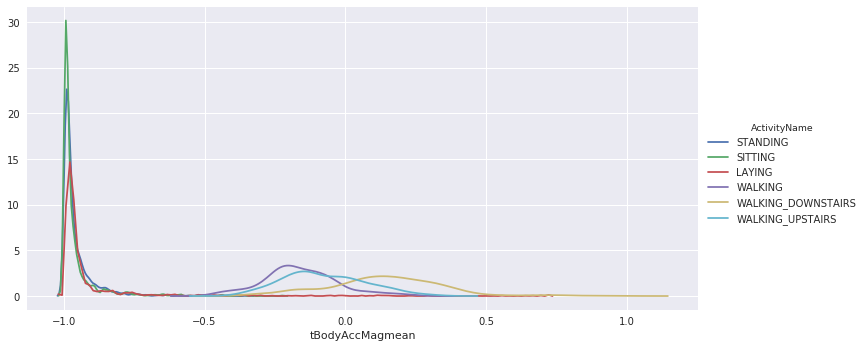

In [15]:
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
# plt.savefig('sns.png')
plt.show()

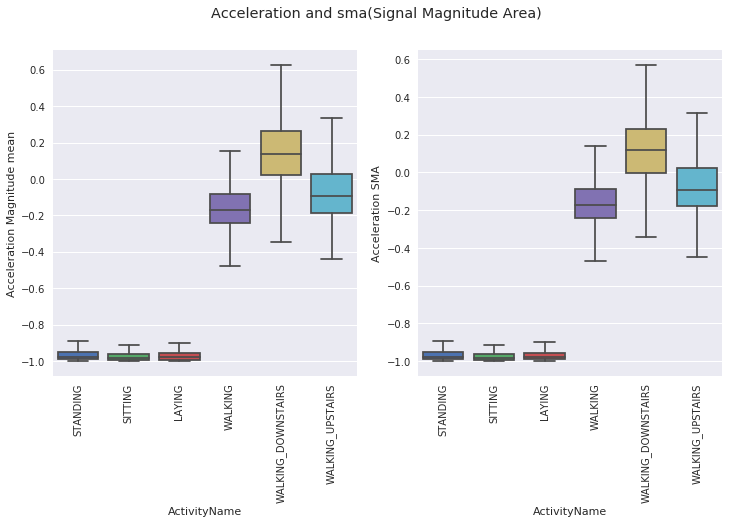

In [16]:
from matplotlib import gridspec

#figsize(width, height in inches)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Acceleration and sma(Signal Magnitude Area)')
gs = gridspec.GridSpec(nrows=1,ncols=2)

plt.subplot(gs[0,0])
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)


plt.subplot(gs[0,1])
sns.boxplot(x='ActivityName', y='tBodyAccsma',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration SMA')
plt.xticks(rotation=90)
plt.show()

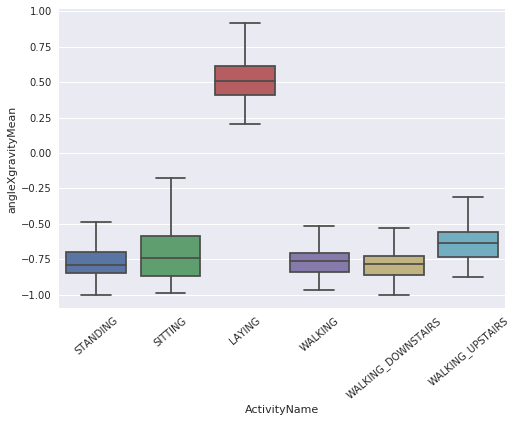

In [17]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train, showfliers=False)

plt.xticks(rotation = 40)
plt.show()

# Apply t-sne on the data 

In [18]:
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','|', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.635909
[t-SNE] Iteration 25: error = 3.7649426, gradient norm = 0.0106389
[t-SNE] Iteration 50: error = 3.7353323, gradient norm = 0.0073201
[t-SNE] Iteration 75: error = 3.5493352, gradient norm = 0.0029623
[t-SNE] Iteration 100: error = 3.4931982, gradient norm = 0.0025805
[t-SNE] KL divergence afte

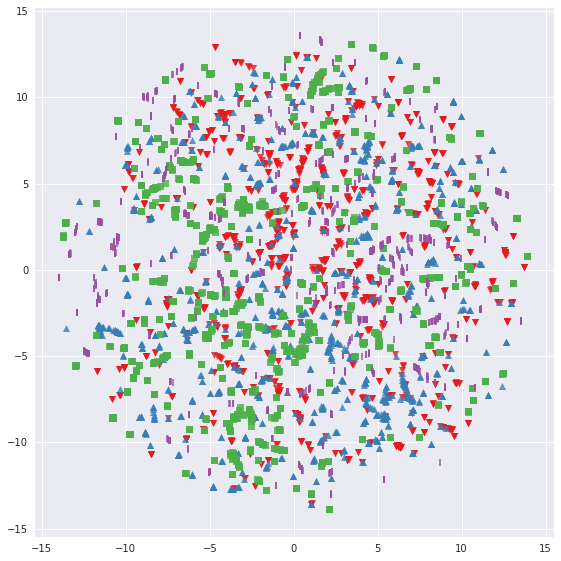

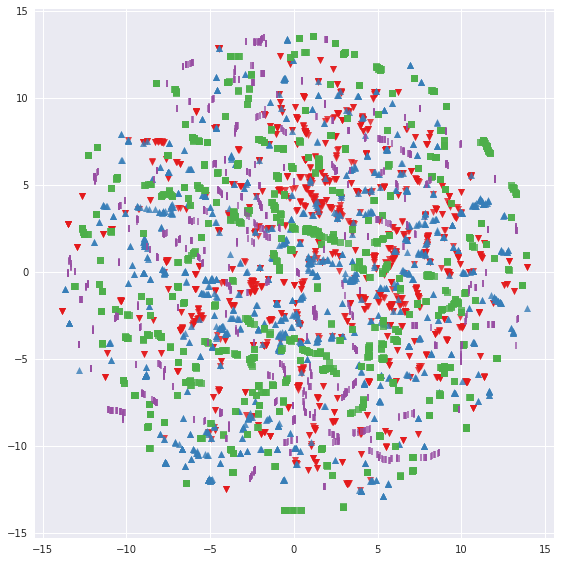

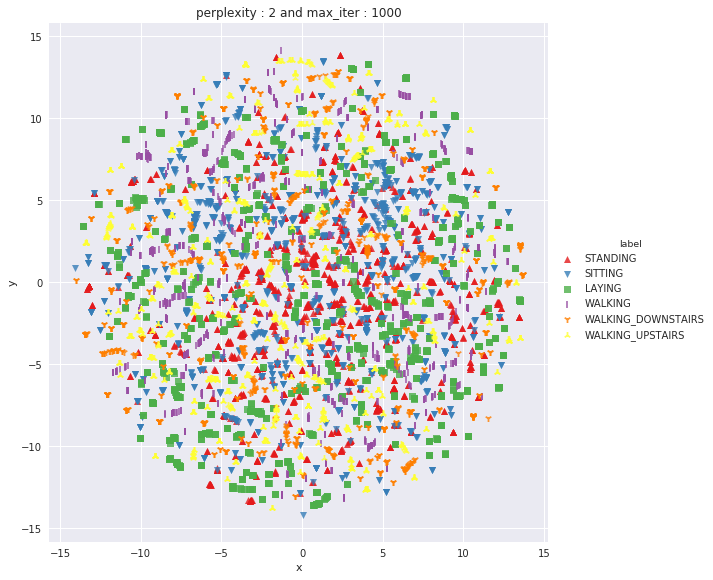

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 0.961029
[t-SNE] Iteration 25: error = 3.0610318, gradient norm = 0.0093673
[t-SNE] Iteration 50: error = 3.0351043, gradient norm = 0.0076028
[t-SNE] Iteration 75: error = 2.8667006, gradient norm = 0.0029270
[t-SNE] Iteration 100: error = 2.8164392, gradient norm = 0.0025423
[t-SNE] KL divergenc

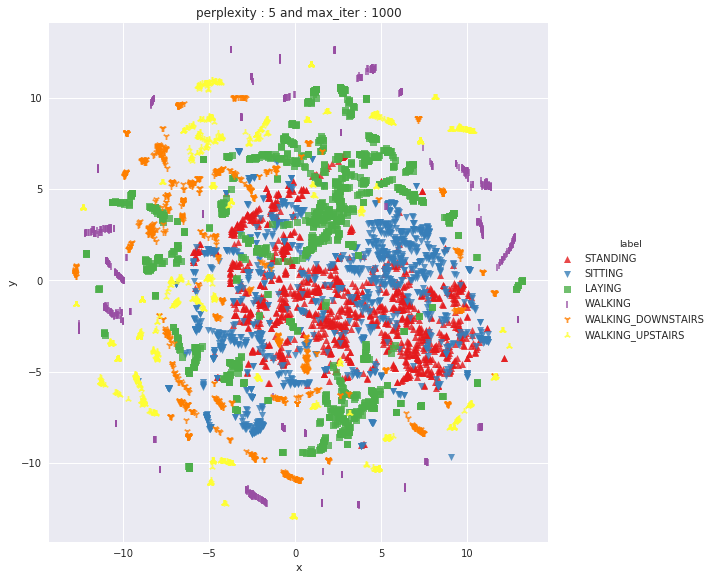

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.133260
[t-SNE] Iteration 25: error = 2.5132105, gradient norm = 0.0077404
[t-SNE] Iteration 50: error = 2.4898465, gradient norm = 0.0079263
[t-SNE] Iteration 75: error = 2.3292236, gradient norm = 0.0028346
[t-SNE] Iteration 100: error = 2.2840600, gradient norm = 0.0024053
[t-SNE] KL divergen

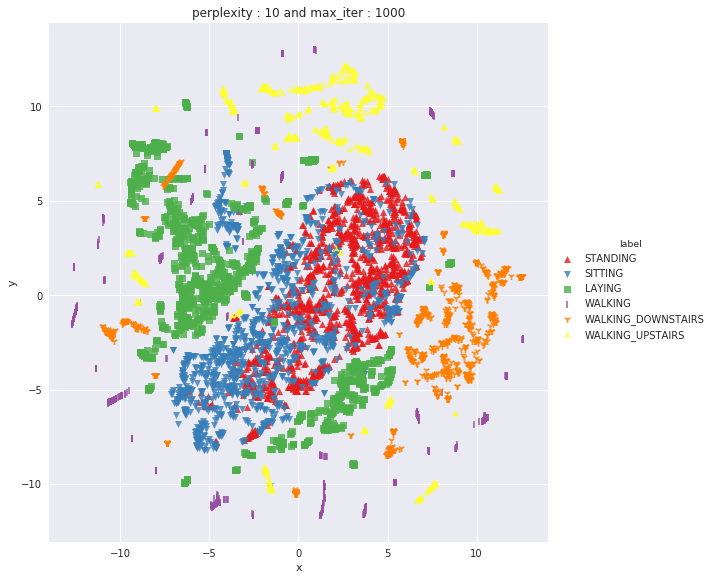

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.273684
[t-SNE] Iteration 25: error = 1.9981524, gradient norm = 0.0058665
[t-SNE] Iteration 50: error = 1.9778852, gradient norm = 0.0082578
[t-SNE] Iteration 75: error = 1.8268918, gradient norm = 0.0027221
[t-SNE] Iteration 100: error = 1.7889324, gradient norm = 0.0023019
[t-SNE] KL divergen

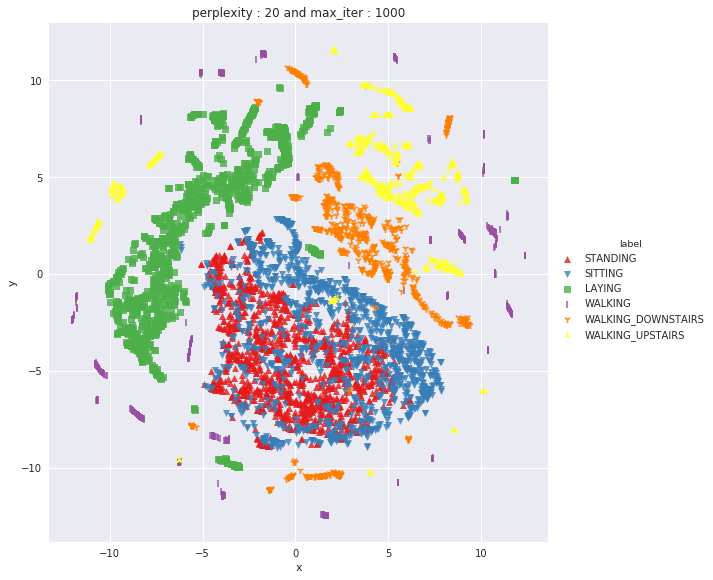

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.436942
[t-SNE] Iteration 25: error = 1.3931541, gradient norm = 0.0037570
[t-SNE] Iteration 50: error = 1.3772856, gradient norm = 0.0087274
[t-SNE] Iteration 75: error = 1.2500405, gradient norm = 0.0024359
[t-SNE] Iteration 100: error = 1.2219106, gradient norm = 0.0020185
[t-SNE] KL diverge

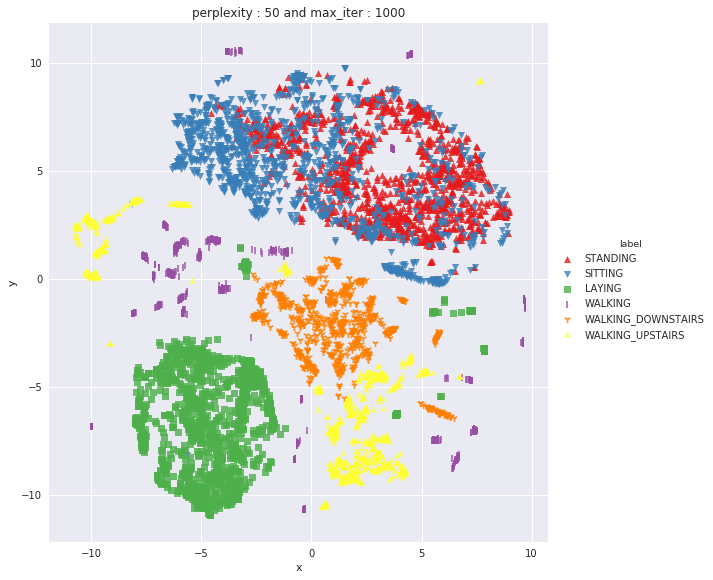

Done


In [29]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])